In [1]:
import pickle
import pathlib

import sorts
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time, TimeDelta
%matplotlib inline

In [2]:
fname = pathlib.Path('.cache') / 'test' / 'fragment_pass_data.pickle'
with open(fname, 'rb') as fh:
    data = pickle.load(fh)

Text(0, 0.5, 'Max SNR [dB]')

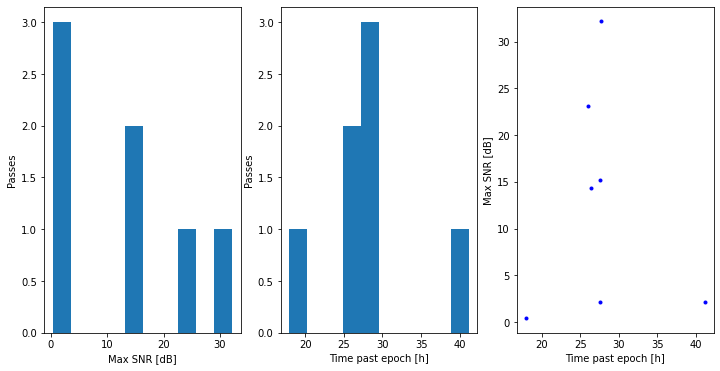

In [10]:
sn = np.array(data[0][0]['peak_snr'])
t = np.array(data[0][0]['peak_time'])

fig, axes = plt.subplots(1,3, figsize=(12,6))
ax = axes[0]
ax.hist(10*np.log10(sn[sn > 1]))
ax.set_xlabel('Max SNR [dB]')
ax.set_ylabel('Passes')

ax = axes[1]
ax.hist(t[sn > 1]/3600.0)
ax.set_xlabel('Time past epoch [h]')
ax.set_ylabel('Passes')

ax = axes[2]
ax.plot(t[sn > 1]/3600.0, 10*np.log10(sn[sn > 1]), '.b')
ax.set_xlabel('Time past epoch [h]')
ax.set_ylabel('Max SNR [dB]')

In [4]:
fname = pathlib.Path('.cache') / 'test' / 'orbit_data.pickle'
with open(fname, 'rb') as fh:
    orbit_data = pickle.load(fh)

In [5]:
sn = []
t = []
for oid in range(len(orbit_data)):
    for ind, d in enumerate(orbit_data[oid][0][0]):
        snm = np.argmax(d['snr'])
        sn.append(d['snr'][snm])
        t.append(d['t'][snm])
t = np.array(t)
sn = np.array(t)

t_sort = np.argsort(t)
t = t[t_sort]
sn = sn[t_sort]

Text(0.5, 0, 'Time past epoch [h]')

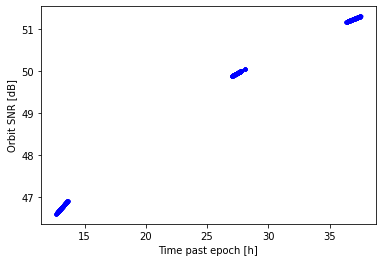

In [6]:
fig, ax = plt.subplots()
ax.plot(t/3600.0, 10*np.log10(sn), '.b')
ax.set_ylabel('Orbit SNR [dB]')
ax.set_xlabel('Time past epoch [h]')